<a href="https://colab.research.google.com/github/KayalvizhiT513/Linear-Algebra-The-Coding-Way/blob/main/Eigenvalues%20and%20Eigenvectors/EigenValuesVectors_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

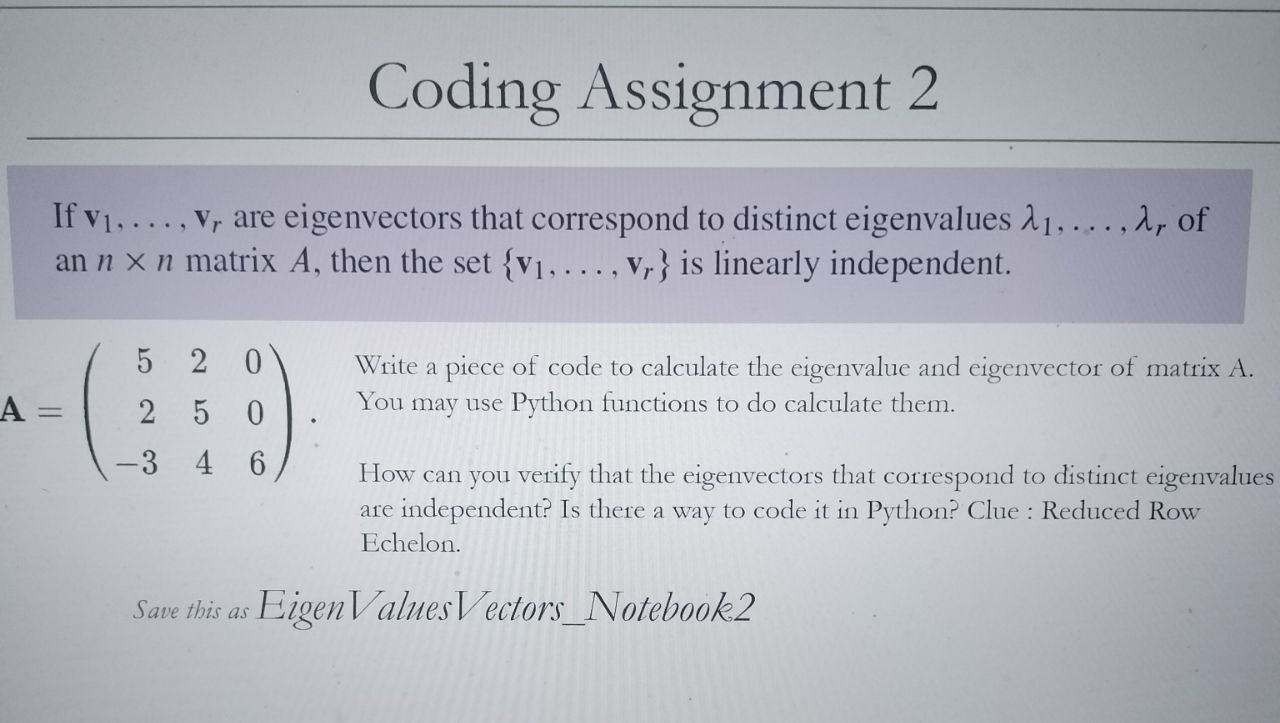

###To verify that the eigenvectors that corresponds to distinct eigenvalues are linearly-independent:
<b>Step 1:</b> Find the eigenvalues and eigenvectors of the given matrix<br>
<b>Step 2:</b> Stack the eigenvectors into a square matrix<br>
<b>Step 3:</b> Find the Reduced Row Echelon Form of the matrix formed from the matrix of eigenvectors<br>
<b>Step 4:</b> If the number of non-zero rows of RREF matches the shape of the original matrix, then the matrix is said to be linearly independent<br>
Since the matrix is formed from the eigenvectors, they are also linearly independent<br><hr>
####For matrices whose eigenvalues are <b>not unique</b> their corresponding eigenvectors may or may not be linearly-independent

In [1]:
import numpy as np
import sympy as sp

In [2]:
def replace_small_values(matrix, threshold=1e-10):
    # Create a copy of the input matrix
    new_matrix = np.array(matrix.copy())

    # Replace values with absolute value >= threshold as 0
    new_matrix[np.abs(new_matrix) <= threshold] = 0

    return new_matrix

In [8]:
def eigen_values_vectors(M):
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(M)

    # Print eigenvalues and eigenvectors
    print("Eigenvalues:", eigenvalues)
    print("Eigenvectors:")

    # Concatenate eigenvectors into a matrix
    eig_matrix = np.column_stack(eigenvectors)
    eig_matrix = replace_small_values(eig_matrix)
    print(eig_matrix)

    # Converting numpy array into sympy matrix
    eig_matrix_sympy = sp.Matrix(eig_matrix)

    # Compute the reduced row echelon form (RREF)
    rref = eig_matrix_sympy.rref()
    print("\nRREF:")
    print(rref[0])

    # Counting number of non-zero rows in RREF
    non_zero_rows = np.count_nonzero(rref[0])
    print("\nNumber of non-zero rows in the RREF:", non_zero_rows)

    # Check if eigenvectors are distinct and linearly independent
    if non_zero_rows == min(M.shape):
        unique_elements = np.unique(eigenvalues)
        if len(unique_elements) == len(eigenvalues):
            print("\nThe Eigenvalues are distinct & the Eigenvectors are linearly independent.")
        else:
            print("\nThe Eigenvalues are not distinct but the Eigenvectors are linearly independent.")
    else:
        print("\nThe Eigenvalues are not distinct & the Eigenvectors are linearly dependent.")


Eigenvectors corresponding to distinct eigenvalues are linearly independent


In [4]:
 # Define the matrix A
A = np.array([[5, 2, 0],
              [2, 5, 0],
              [-3, 4, 6]])
eigen_values_vectors(A)

Eigenvalues: [6. 7. 3.]
Eigenvectors:
[[ 0.          0.          1.        ]
 [ 0.57735027  0.57735027  0.57735027]
 [ 0.36650833 -0.36650833  0.85518611]]

RREF:
Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

Number of non-zero rows in the RREF: 3

The Eigenvalues are distinct & the Eigenvectors are linearly independent.


In [5]:
# Define the matrix A
A1 = np.array([[2, 1, 0],
               [1, 3, -1],
               [0, -1, 4]])
eigen_values_vectors(A1)

Eigenvalues: [1.26794919 3.         4.73205081]
Eigenvectors:
[[-0.78867513  0.57735027  0.21132487]
 [-0.57735027 -0.57735027 -0.57735027]
 [-0.21132487 -0.57735027  0.78867513]]

RREF:
Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

Number of non-zero rows in the RREF: 3

The Eigenvalues are distinct & the Eigenvectors are linearly independent.


Two different eigenvectors corresponding to the same eigenvalue are not always linearly dependent

In [6]:
B1 = np.array([[2, 1],
               [0, 2]])
eigen_values_vectors(B1)

Eigenvalues: [2. 2.]
Eigenvectors:
[[ 1.  0.]
 [-1.  0.]]

RREF:
Matrix([[1, 0], [0, 0]])

Number of non-zero rows in the RREF: 1

The Eigenvalues are not distinct & the Eigenvectors are linearly dependent.


In [7]:
B2 = np.array([[2, 0],
               [0, 2]])
eigen_values_vectors(B2)

Eigenvalues: [2. 2.]
Eigenvectors:
[[1. 0.]
 [0. 1.]]

RREF:
Matrix([[1, 0], [0, 1]])

Number of non-zero rows in the RREF: 2

The Eigenvalues are not distinct but the Eigenvectors are linearly independent.
